In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Prep and Loading 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
torch.__version__ 

'2.7.1+cpu'

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
#1 convert the input into numerical encoding
#2 create a dataset
#4 learn the representation(patterns / features / weights) of the data
#3 create a model
#4 train the model

In [9]:
#create known parameters

weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [8]:
y.shape

torch.Size([50, 1])

In [11]:
len(X), len(y)

(50, 50)

In [13]:
#splitting the data into training and testing sets



train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]
# #creating a dataset
# train_data = torch.utils.data.TensorDataset(X_train, y_train)
# test_data = torch.utils.data.TensorDataset(X_test, y_test)
# #creating a dataloader

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [20]:
def plot_predictions(train_data = X_train, 
                     test_data = X_test, 
                     train_labels = y_train, 
                     test_labels = y_test, 
                     predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="y", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")    

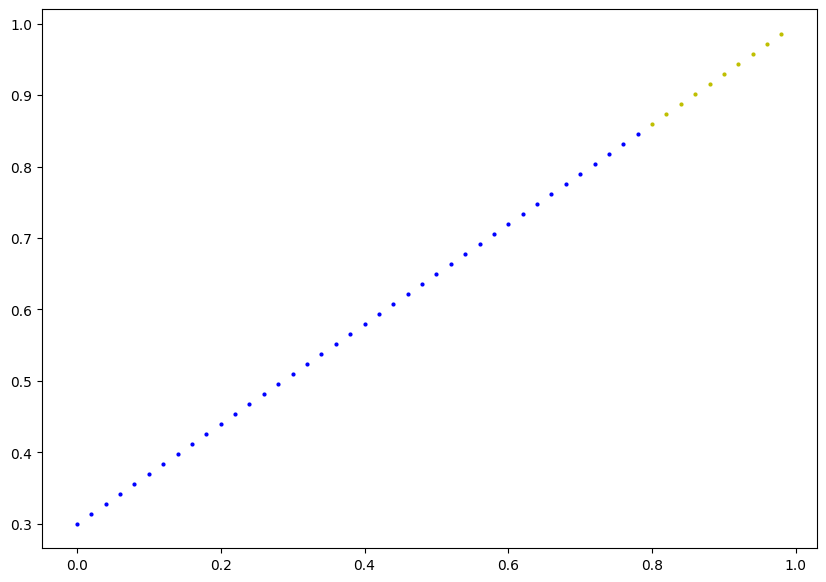

In [21]:
plot_predictions()

In [29]:

#Build model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(
                                                1, 
                                                requires_grad=True, 
                                                dtype=torch.float32
                                               ))
        self.bias = nn.Parameter(torch.randn(
                                                1,
                                                requires_grad=True,
                                                dtype=torch.float32))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [35]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [36]:
#Make predictions with the model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

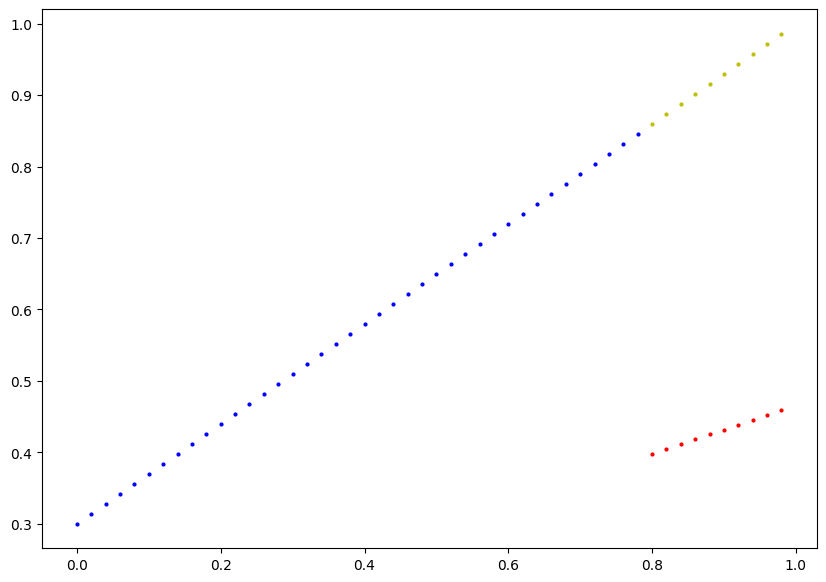

In [55]:
#visualize the predictions with random params

plot_predictions(predictions=y_preds)

In [56]:
#Traning our model

learning_rate = 0.01

loss_fn = nn.L1Loss()

optimizer = optim.SGD(params=model_0.parameters(), lr=learning_rate)

loss_fn , optimizer




(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [57]:
%%time 
# Debug: Check model and data device/dtype before training
print('Model device:', next(model_0.parameters()).device)
print('X_train device:', X_train.device, 'dtype:', X_train.dtype)
print('y_train device:', y_train.device, 'dtype:', y_train.dtype)
print('Optimizer params:', list(optimizer.param_groups))

torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)

        # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test) # both are float32 and on the same device

        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().cpu().numpy())
            test_loss_values.append(test_loss.detach().cpu().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss.item()} | MAE Test Loss: {test_loss.item()} ")

Model device: cpu
X_train device: cpu dtype: torch.float32
y_train device: cpu dtype: torch.float32
Optimizer params: [{'params': [Parameter containing:
tensor([0.6990], requires_grad=True), Parameter containing:
tensor([0.3093], requires_grad=True)], 'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None}]
Epoch: 0 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 10 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 20 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 30 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 40 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 50 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882 
Epoch: 60 | MAE Train Loss: 0.008932482451200485 | MAE Test Los

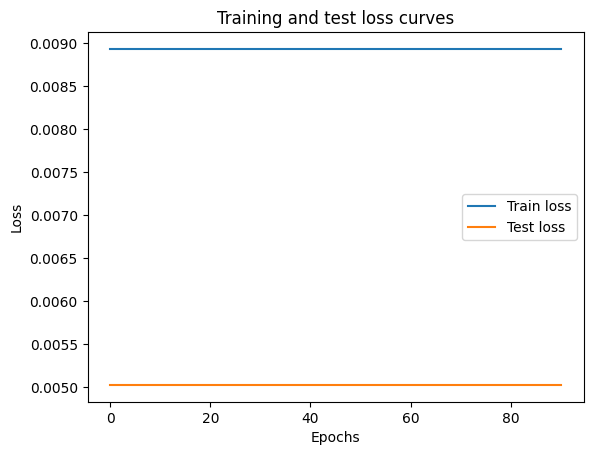

In [60]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [61]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weight': tensor([0.6990]), 'bias': tensor([0.3093])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

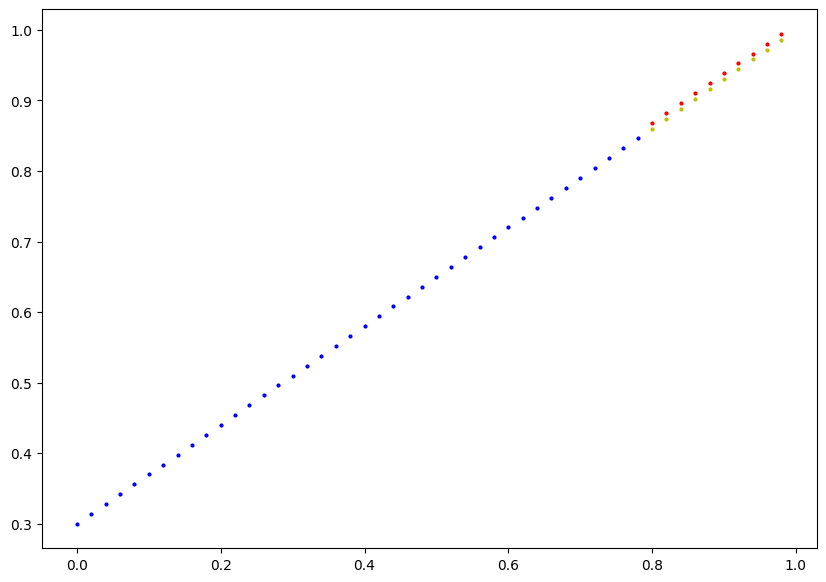

In [63]:

plot_predictions(predictions=y_preds)

In [65]:
#the MSE of the predictions
mse = torch.mean((y_preds - y_test)**2)
print(f"Mean Squared Error of the predictions: {mse.item()}")

#accuracy
accuracy = torch.mean((y_preds == y_test).float())
print(f"Accuracy of the predictions: {accuracy.item() * 100:.2f}%")


Mean Squared Error of the predictions: 7.136997010093182e-05
Accuracy of the predictions: 0.00%


## Saving a Model in PyTorch

In [68]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "linear_regression_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models\linear_regression_model_0.pth


In [72]:
!dir models


 Volume in drive C is Windows-SSD
 Volume Serial Number is A49E-B5EC

 Directory of c:\Users\Kata\Desktop\PyTorch\models

12-08-2025  22:54    <DIR>          .
12-08-2025  22:54    <DIR>          ..
12-08-2025  22:55             2,101 linear_regression_model_0.pth
               1 File(s)          2,101 bytes
               2 Dir(s)  254,795,710,464 bytes free
